## BLINKIT ANALYSIS PROJECT


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORT DATA

In [10]:
df = pd.read_csv("BlinkIT Grocery Data.csv")
df.head(5)


,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


## SIZE OF THE DATA

In [11]:
print("Size of Data:",df.shape)

Size of Data: (8523, 12)


In [13]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [19]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

## Data Cleaning

In [20]:
print(df["Item Fat Content"].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [24]:
df["Item Fat Content"] = df["Item Fat Content"].replace({
    'LF': 'Low Fat',
    'reg': 'Regular',
    'low fat': 'Low Fat'
})


In [25]:
print(df["Item Fat Content"].unique())

['Regular' 'Low Fat']


## KPI REQUIREMENTS


In [45]:
## Total Sales
total_sales= df['Sales'].sum()

## Average sales
avg_sales= df['Sales'].mean()

##No of items
no_of_item_sold = df['Sales'].count()

##Average Rating
avg_rating = df['Rating'].mean()

In [46]:
print(total_sales)
print(avg_sales)
print(no_of_item_sold)
print(avg_rating)


1201681.4928
140.99278338613163
8523
3.965857092573038


## CHART REQUIREMENTS

## Total sales by Fat Content

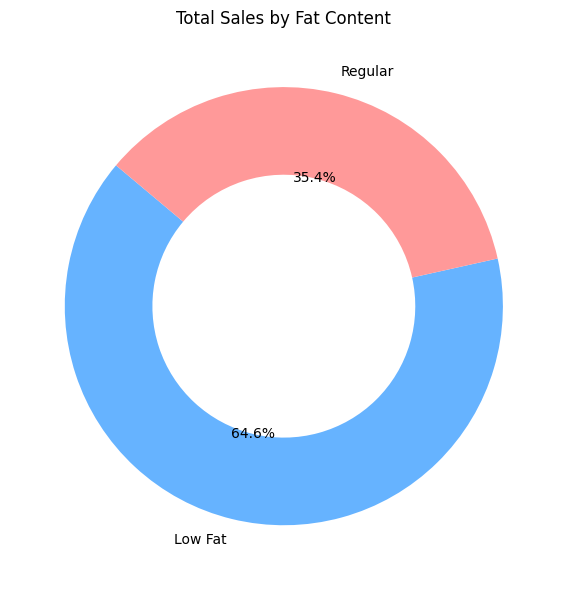

In [56]:

# Group data
total_sales_by_fat = df.groupby('Item Fat Content')['Sales'].sum()

# Plot
plt.figure(figsize=(6,6))
colors = ['#66b3ff','#ff9999','#99ff99']  # you can adjust colors

# Create pie chart
plt.pie(total_sales_by_fat, labels=total_sales_by_fat.index, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops={'width':0.4})

# Add title and show
plt.title('Total Sales by Fat Content')
plt.tight_layout()
plt.show()


## Total sales by item type

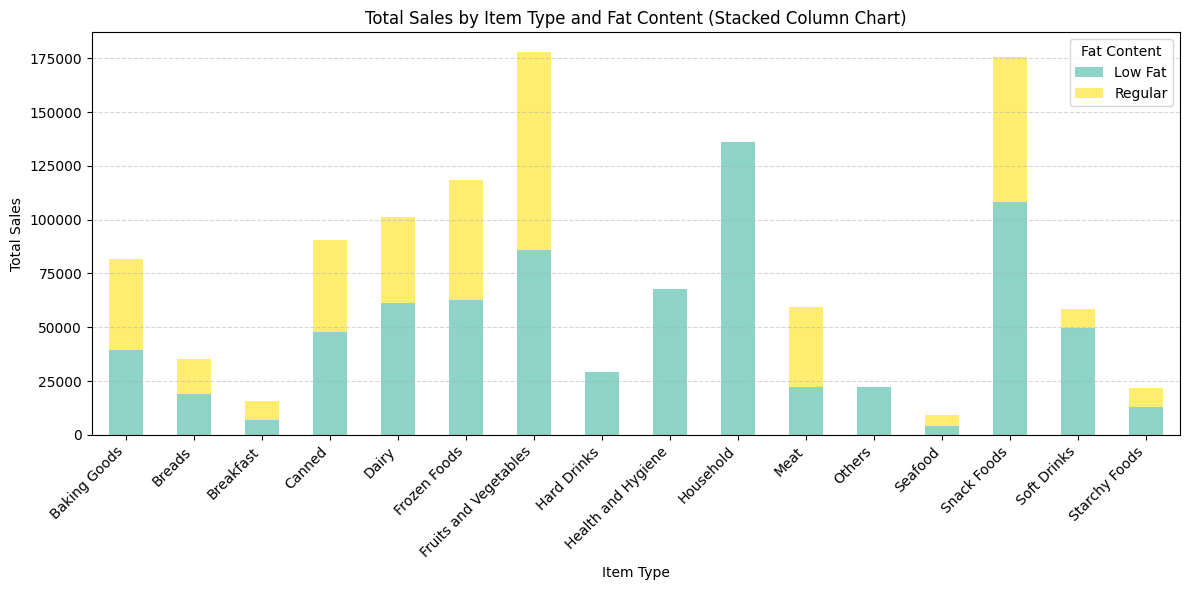

In [52]:
#Group by Item Type and Fat Content, summing Sales
grouped = df.groupby(['Item Type', 'Item Fat Content'])['Sales'].sum().unstack(fill_value=0)

#Plot stacked column chart
grouped.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set3')

# Chart formatting
plt.title('Total Sales by Item Type and Fat Content (Stacked Column Chart)')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Fat Content')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# 5. Show chart
plt.show()


## Fat Content by Outlet for Total Sales

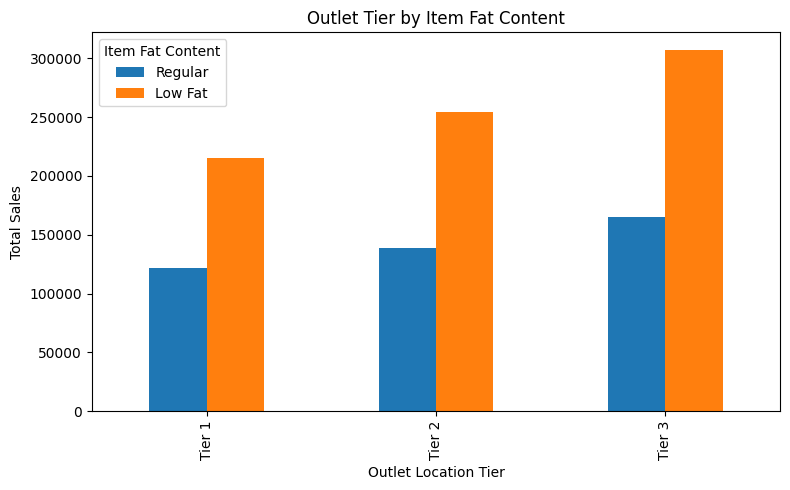

In [57]:
grouped= df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped = grouped[['Regular','Low Fat']]

ax = grouped.plot(kind='bar',figsize=(8,5),title='Outlet Tier by Item Fat Content')
plt.xlabel('Outlet Location Tier')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

In [58]:
df.columns


Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

## Total Sales by Outlet Establishment

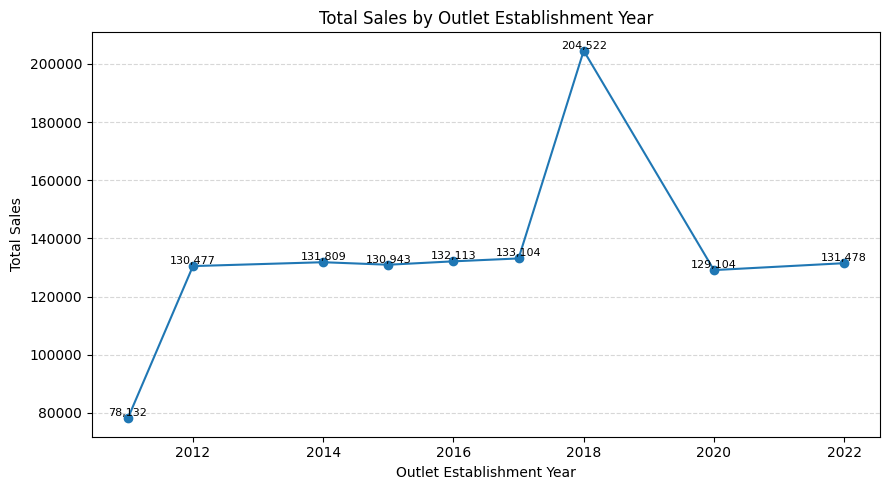

In [59]:
sales_by_year = df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()

plt.figure(figsize=(9,5))
plt.plot(sales_by_year.index, sales_by_year.values, marker='o', linestyle='-')

plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Outlet Establishment Year')

# Add data labels
for x, y in zip(sales_by_year.index, sales_by_year.values):
    plt.text(x, y, f"{y:,.0f}", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()



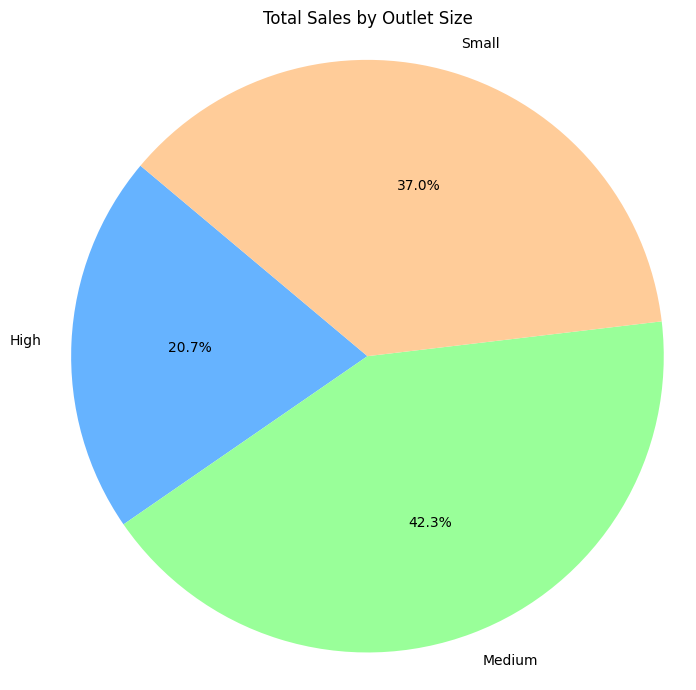

In [60]:

sales_by_size = df.groupby('Outlet Size')['Sales'].sum()

plt.figure(figsize=(7,7))
colors = ['#66b3ff','#99ff99','#ffcc99']  # customize as needed
plt.pie(sales_by_size, labels=sales_by_size.index, autopct='%1.1f%%', startangle=140, colors=colors)

plt.title('Total Sales by Outlet Size')
plt.axis('equal')  # Equal aspect ratio ensures circle
plt.tight_layout()
plt.show()


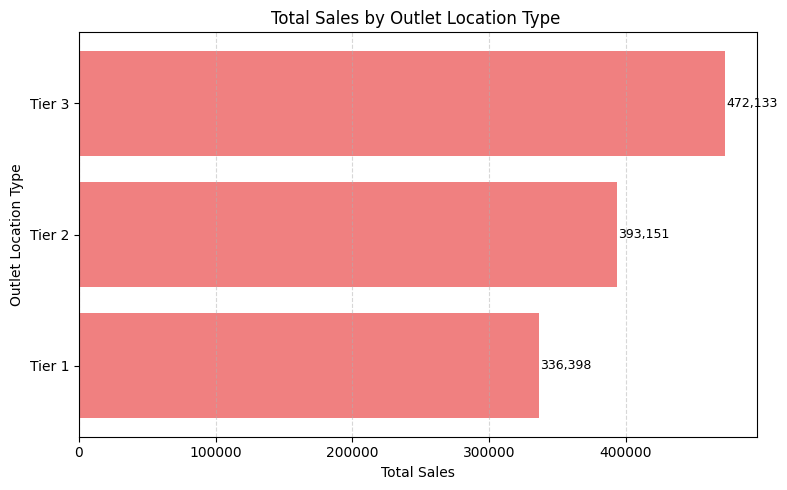

In [62]:

sales_by_location = df.groupby('Outlet Location Type')['Sales'].sum().sort_values(ascending=False)


plt.figure(figsize=(8,5))
bars = plt.barh(sales_by_location.index, sales_by_location.values, color='lightcoral')

plt.gca().invert_yaxis()

for i, (value, label) in enumerate(zip(sales_by_location.values, sales_by_location.index)):
    plt.text(value + 1000, i, f"{value:,.0f}", va='center', fontsize=9)

plt.title("Total Sales by Outlet Location Type ")
plt.xlabel("Total Sales")
plt.ylabel("Outlet Location Type")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()
